# **Prediccion de Insuficiencia Cardiaca**

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Contexto**

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se stima que cobran 17.9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cindo muertes por ECV se deben a ataques cardìacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y un manejo tempranos, donde un modelo de aprendizaje automático puede ser de gran ayuda.

**Información de atributos**

1. Age: Edad del paciente(años)
2. Sex: sexo del paciente(M:Masculino, F:Femenino)
3. ChestPainType: Tipo de dolor en el pecho(TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático)
4. RestingBP: Presión arterial en reposo (mmHg)
5. Cholesterol: Colesterol sérico(mm/dl)
6. FastingBS: Azucar en sangre en ayunas (1: si FastingBS> 120 mg/dl, 0: en caso contrario)
7. RestingECG:  resultados del electrocardiograma en reposo(Normal: normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de> 0,05 mV), HVI: muestra probable o definitiva hipertrofia ventricular izquierda por Estes' criterios)
8. MaxHR: Frecuencia cardiaca maxima alcanzada (entre 60 y 202)
9. ExerciseAngina: Angina inducida por el ejercicio(Y:si,N:No)
10. Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
11. ST_Slope: la pendiente del segmento ST del ejercicio máximo (Arriba: ascendente, Plano: plano, Abajo: descendente)
12. HeartDisease: Clase de salida (1:enfermedad cardíaca, 0:normal)

In [175]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/ecv/heart.csv',
                 sep=',',
                 na_values={'RestingBP':0,'Cholesterol':0})
display(df.head())
print(df.shape)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


(918, 12)


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


2. **Limpieza de datos**

* Detección y manejo de duplicados

In [178]:
# Identificar datos duplicados:
# =========================================================
duplicados = df[df.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


* Manejo de valores faltantes

In [179]:
# Instalamos la librería Missigno
# !pip install Missigno

In [180]:
import missingno

In [181]:
def report_missings(data):
    
    porc_valores_perdidos = round((data.isnull().sum(axis=0).sort_values(ascending=False)/len(data))*3,ndigits=3)
    cant_valores_perdidos = data.isnull().sum(axis=0).sort_values(ascending= False)
    df_valores_perdidos = pd.concat([cant_valores_perdidos,porc_valores_perdidos],axis = 'columns').reset_index()
    df_valores_perdidos.columns = ['Variables','Cant. Nulos','% Nulos']
    df_valores_perdidos['Cant. No Nulos'] = len(data) - df_valores_perdidos['Cant. Nulos']
    
    print('='*100)
    print('*'*32,'Descripción de Valores Perdidos','*'*32)
    print('='*100)
    print('\n',df_valores_perdidos,'\n')
    
    import seaborn as sns
    df_perd = pd.DataFrame(df_valores_perdidos,columns=['Variables','cant_nulos','porc_nulos','cant_no_nulos'])
    
    fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols = 2,figsize =(20,8))
    
    sns.barplot(data = df_perd,x='Variables',y='porc_nulos',ax=ax1)
    ax1.set_ylabel('Porcentaje de datos faltantes(%)')
    ax1.set_ylim(0,100)
    ax1.set_title('Porcentaje de datos faltantes por variables',fontweight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation= 45)

    
    sns.heatmap(data= data.isnull().T,ax=ax2,cmap='viridis')
    ax2.set_title('Distribución de valores perdidos',fontweight='bold')

    
    import missingno
    missingno.heatmap(data,ax = ax3,cmap='cividis',vmin=0,fontsize = 12)
    ax3.set_title('Correlación de nulidad entre variables',fontweight='bold')
    
    missingno.dendrogram(data,ax=ax4,fontsize = 12)
    ax4.set_title('Dendograma basado en la correlación de valores faltantes',fontweight='bold')
    #ax4.set_ylim([0, 1.1])
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

******************************** Descripción de Valores Perdidos ********************************

          Variables  Cant. Nulos  % Nulos  Cant. No Nulos
0      Cholesterol          172    0.562             746
1        RestingBP            1    0.003             917
2              Age            0    0.000             918
3              Sex            0    0.000             918
4    ChestPainType            0    0.000             918
5        FastingBS            0    0.000             918
6       RestingECG            0    0.000             918
7            MaxHR            0    0.000             918
8   ExerciseAngina            0    0.000             918
9          Oldpeak            0    0.000             918
10        ST_Slope            0    0.000             918
11    HeartDisease            0    0.000             918 



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

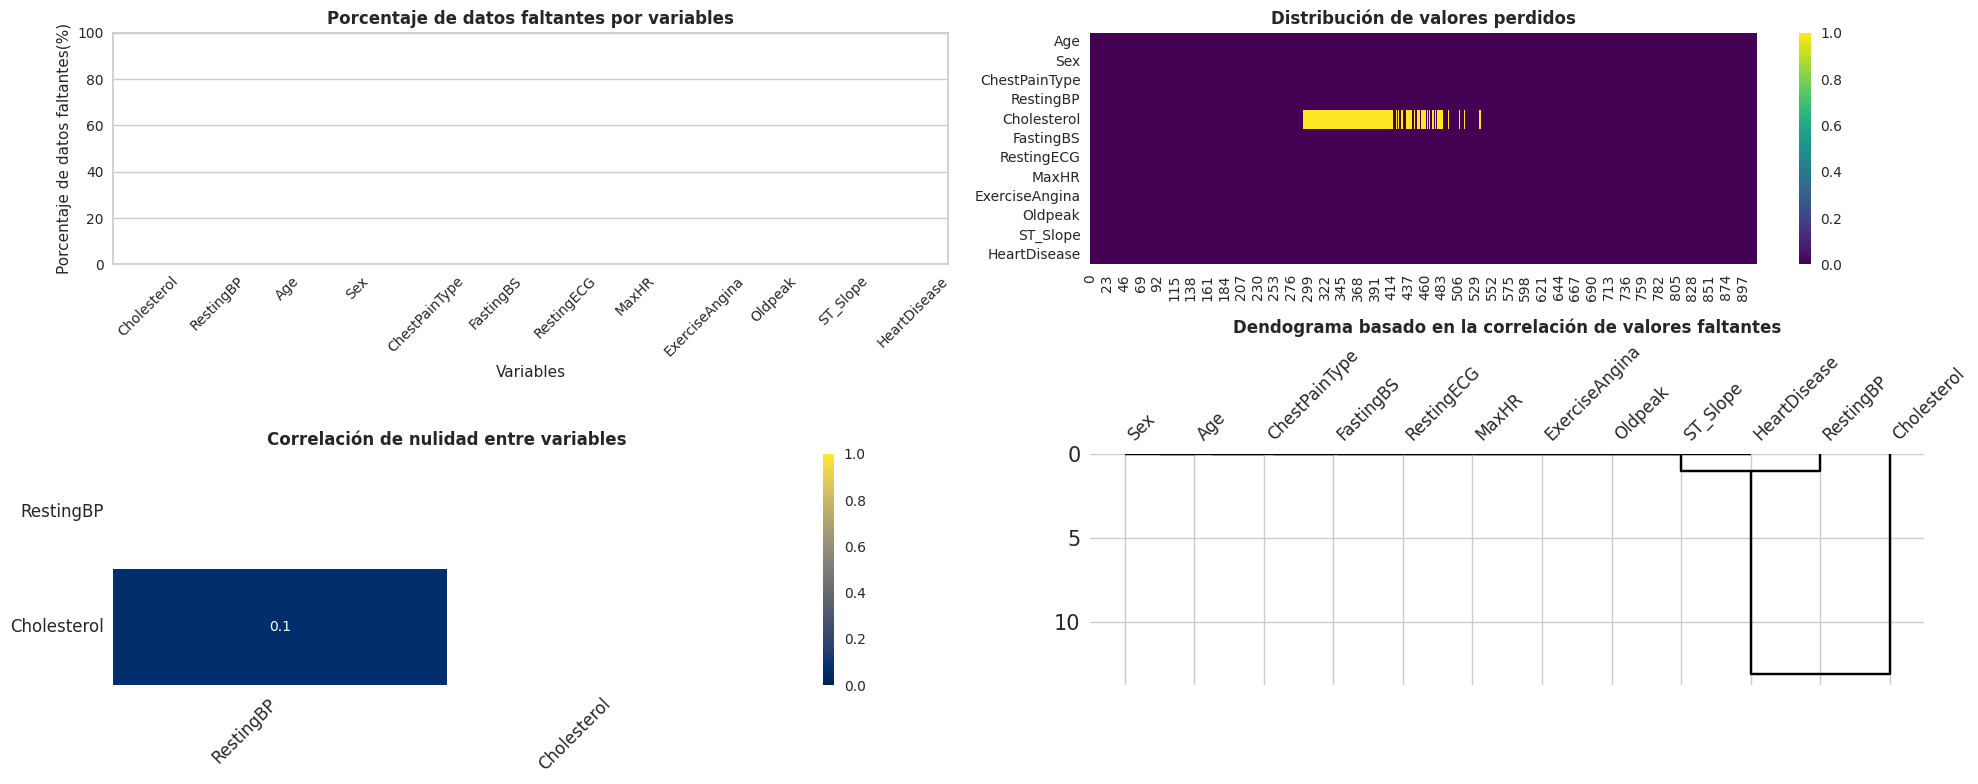

In [182]:
report_missings(df)

Seleccionamos a las columnas que tenga `valores perdidos`

In [183]:
# Identificar a las columnas con valores perdidos
# =========================================================================
columns_na = df.columns[df.isnull().any()].tolist()

# Mostrar las columnas con valores perdidos
# =========================================================================
print(columns_na)

['RestingBP', 'Cholesterol']


* Imputación con `kNNImputer` 

In [184]:
from sklearn.impute import KNNImputer

In [185]:
imputer_knn = KNNImputer(n_neighbors=10,
                         weights='distance',
                         metric='nan_euclidean')
data_imputed = imputer_knn.fit_transform(df[columns_na])

In [186]:
# Transformar el resultado a un DataFrame
# =========================================================================
df_imp = pd.DataFrame(data_imputed,columns=columns_na)
display(df_imp.tail())

,RestingBP,Cholesterol
913,110.0,264.0
914,144.0,193.0
915,130.0,131.0
916,130.0,236.0
917,138.0,175.0


In [187]:
# Concatenar el DataFrame imputado con el original
# ========================================================================
df = pd.concat([df.drop(columns=columns_na),df_imp],axis='columns')
df.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP,Cholesterol
0,40,M,ATA,0,Normal,172,N,0.0,Up,0,140.0,289.0
1,49,F,NAP,0,Normal,156,N,1.0,Flat,1,160.0,180.0
2,37,M,ATA,0,ST,98,N,0.0,Up,0,130.0,283.0
3,48,F,ASY,0,Normal,108,Y,1.5,Flat,1,138.0,214.0
4,54,M,NAP,0,Normal,122,N,0.0,Up,0,150.0,195.0


In [188]:
# Convertir las columnas a minusculas
#  ========================================================
df.columns = df.columns.str.lower()

In [189]:
variables_categoricas = df.select_dtypes(exclude='number').columns.values
print(f'Tenemos a la variables categoricas: {variables_categoricas}')
print(len(variables_categoricas))

Tenemos a la variables categoricas: ['sex' 'chestpaintype' 'restingecg' 'exerciseangina' 'st_slope']
5


In [190]:
variables_numericas = df.select_dtypes(include='number').columns.values
print(f'Tenemos a la variables numericas: {variables_numericas}')
print(len(variables_numericas))

Tenemos a la variables numericas: ['age' 'fastingbs' 'maxhr' 'oldpeak' 'heartdisease' 'restingbp'
 'cholesterol']
7


3. **Análisis Univariado**

* Estadística descriptiva

In [191]:
# resumen estadistico descriptivo
# =================================================================
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chestpaintype,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fastingbs,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
restingecg,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxhr,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
exerciseangina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2
st_slope,918,3,Flat,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heartdisease,918.0,NaN,NaN,NaN,0.553377,0.497414,0.0,0.0,1.0,1.0,1.0


* Visualizaciones

`Variables Categoricas`

sex

In [192]:
tab_sex = df['sex'].value_counts(normalize=True,dropna=False)*100
tab_sex = tab_sex.reset_index()
tab_sex.columns = ['sexo','Frecuencia relativa']
tab_sex

,sexo,Frecuencia relativa
0,M,78.976035
1,F,21.023965


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

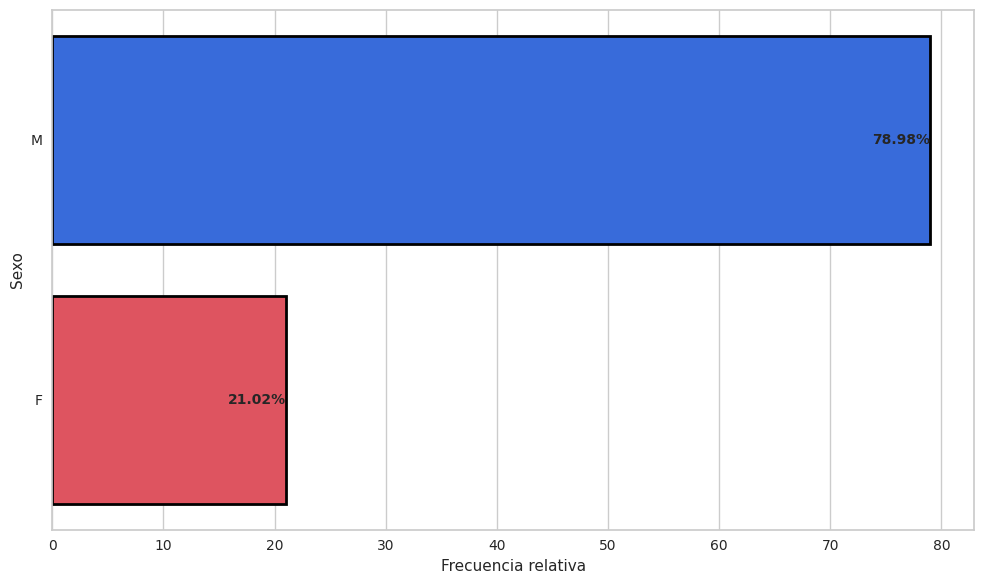

In [193]:
# Suponiendo que 'tab_sex' es tu DataFrame y 'sexo' y 'Frecuencia relativa' son las columnas
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
sns.barplot(data=tab_sex, y='sexo', x='Frecuencia relativa',
            palette=['#1D61F5','#F53D4D'],edgecolor='black',linewidth=2)
plt.ylabel('Sexo')
# Añadir porcentaje a las barras
for index, value in enumerate(tab_sex['Frecuencia relativa']):
    percentage = '{:.2f}%'.format(value )  # Calcular el porcentaje
    plt.text(value, index, percentage, ha='right', va='center', fontsize=10,fontweight='bold')  # Mostrar el porcentaje en la barra
plt.tight_layout()
plt.show()


 chestpaintype

In [194]:
tab_chestpaintype = df['chestpaintype'].value_counts(normalize=True)*100
tab_chestpaintype = tab_chestpaintype.reset_index()
tab_chestpaintype.columns= ['chestpaintype','Frecuencia relativa']
tab_chestpaintype

,chestpaintype,Frecuencia relativa
0,ASY,54.030501
1,NAP,22.113290
2,ATA,18.845316
3,TA,5.010893


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

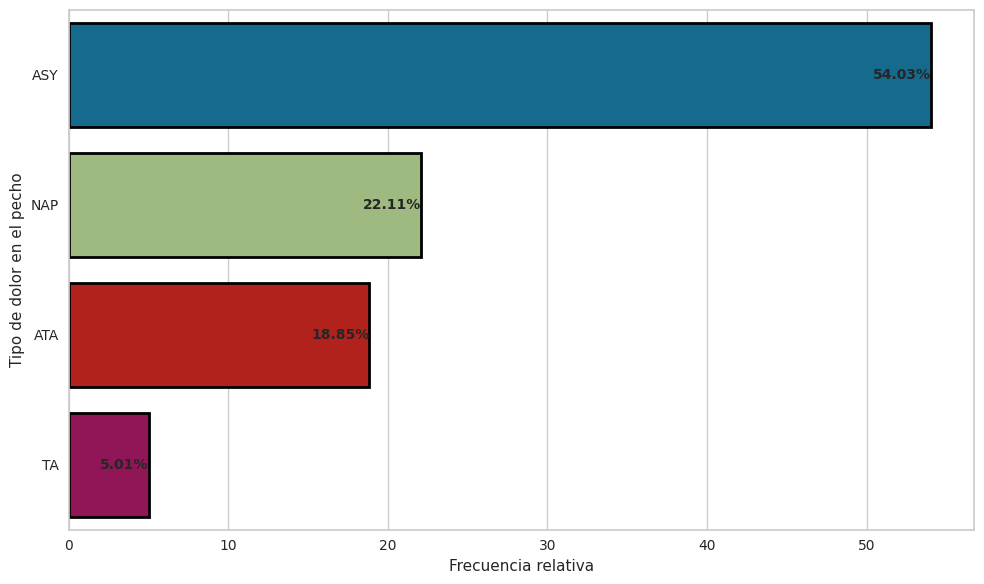

In [195]:
fig ,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=tab_chestpaintype,y='chestpaintype',x='Frecuencia relativa',edgecolor='black',linewidth=2)
sns.color_palette('bright')
plt.ylabel('Tipo de dolor en el pecho')
for index,value in enumerate(tab_chestpaintype['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

restingecg

In [196]:
tab_restingecg = df['restingecg'].value_counts(normalize=True)
tab_restingecg = tab_restingecg.reset_index()
tab_restingecg.columns = ['restingecg','Frecuencia relativa']
tab_restingecg

,restingecg,Frecuencia relativa
0,Normal,0.601307
1,LVH,0.204793
2,ST,0.193900


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

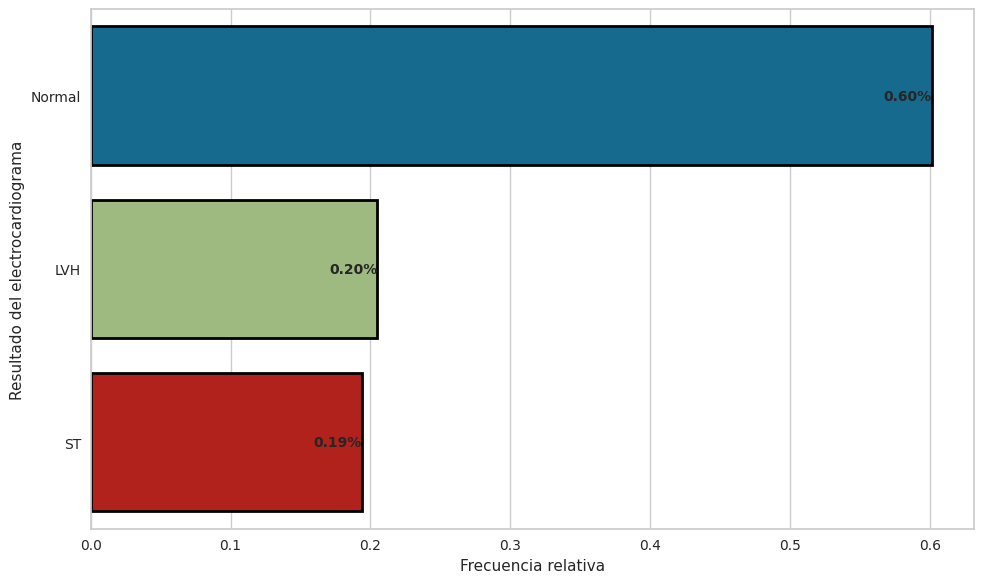

In [197]:
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data=tab_restingecg,y='restingecg',x='Frecuencia relativa',edgecolor = 'black',linewidth=2)
plt.ylabel('Resultado del electrocardiograma')
for index,value in enumerate(tab_restingecg['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize= 10,fontweight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

* exerciseangina

In [198]:
tab_exerciseangina = df['exerciseangina'].value_counts(normalize=True)*100
tab_exerciseangina = tab_exerciseangina.reset_index()
tab_exerciseangina.columns = ['exerciseangina','Frecuencia relativa']
tab_exerciseangina

,exerciseangina,Frecuencia relativa
0,N,59.586057
1,Y,40.413943


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

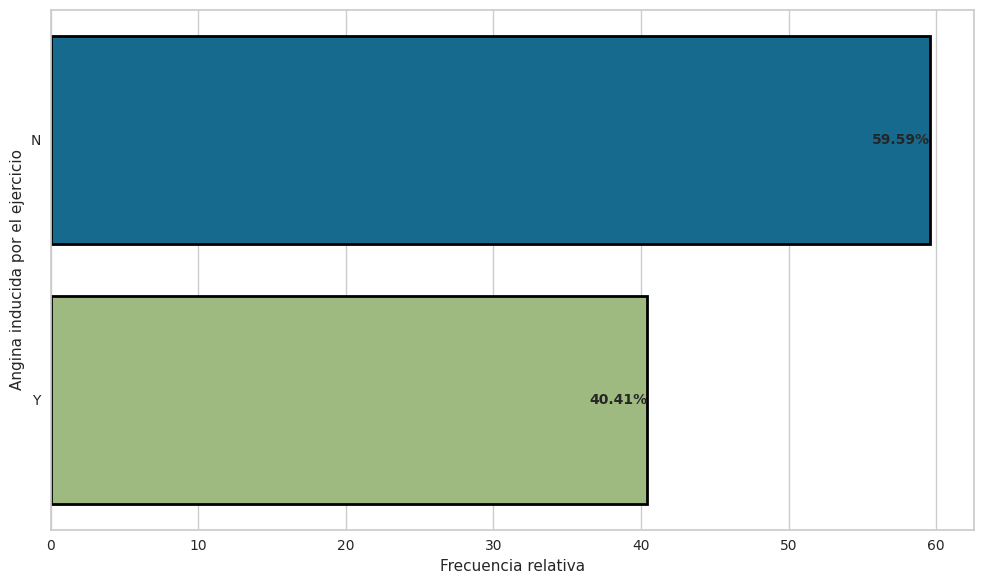

In [199]:
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data= tab_exerciseangina,y='exerciseangina',x='Frecuencia relativa',edgecolor='black',linewidth=2)
plt.ylabel('Angina inducida por el ejercicio')
for index,value in enumerate(tab_exerciseangina['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight='bold')
    plt.tight_layout()
plt.tight_layout()
plt.show()

st_slope

In [200]:
tab_st_slope = df['st_slope'].value_counts(normalize=True)*100
tab_st_slope = tab_st_slope.reset_index()
tab_st_slope.columns = ['st_slope','Frecuencia relativa']
tab_st_slope

,st_slope,Frecuencia relativa
0,Flat,50.108932
1,Up,43.028322
2,Down,6.862745


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

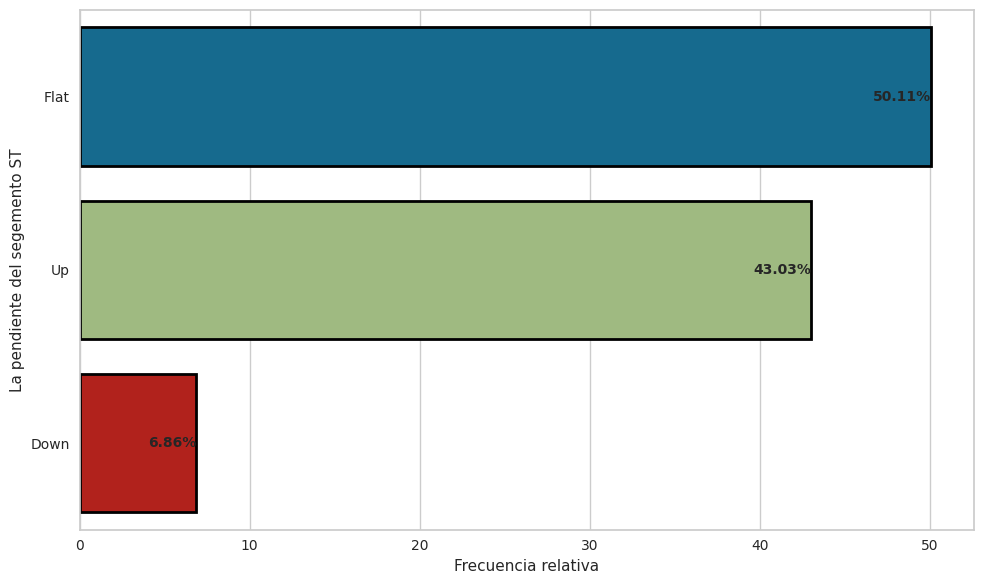

In [201]:
fig ,ax = plt.subplots(figsize =(10,6))
sns.barplot(data=tab_st_slope,y = 'st_slope',x= 'Frecuencia relativa',edgecolor ='black',linewidth=2)
plt.ylabel('La pendiente del segemento ST')
for index,value in enumerate(tab_st_slope['Frecuencia relativa']):
    porcentaje = '{:.2f}%'.format(value)
    plt.text(value,index,porcentaje,ha='right',va='center',fontsize=10,fontweight= 'bold')
plt.tight_layout()
plt.show()

`Variables Numericas`

age

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

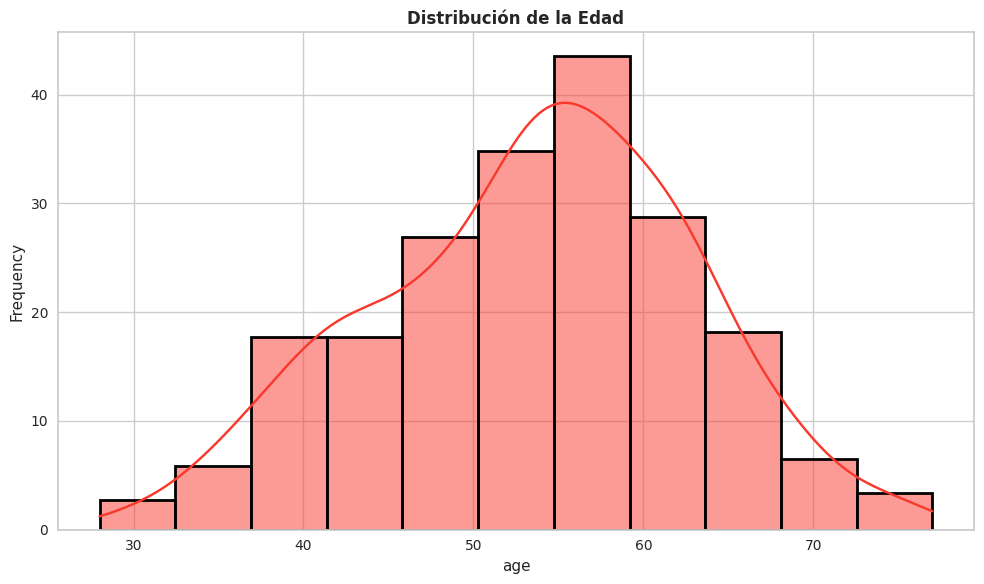

In [202]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='age',bins = 'sturges',
             edgecolor='black',
             linewidth=2,
             color='#FA392D',
             kde=True,
             stat='frequency')
plt.title('Distribución de la Edad',fontweight='bold')
plt.tight_layout()
plt.show()

fastingbs

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

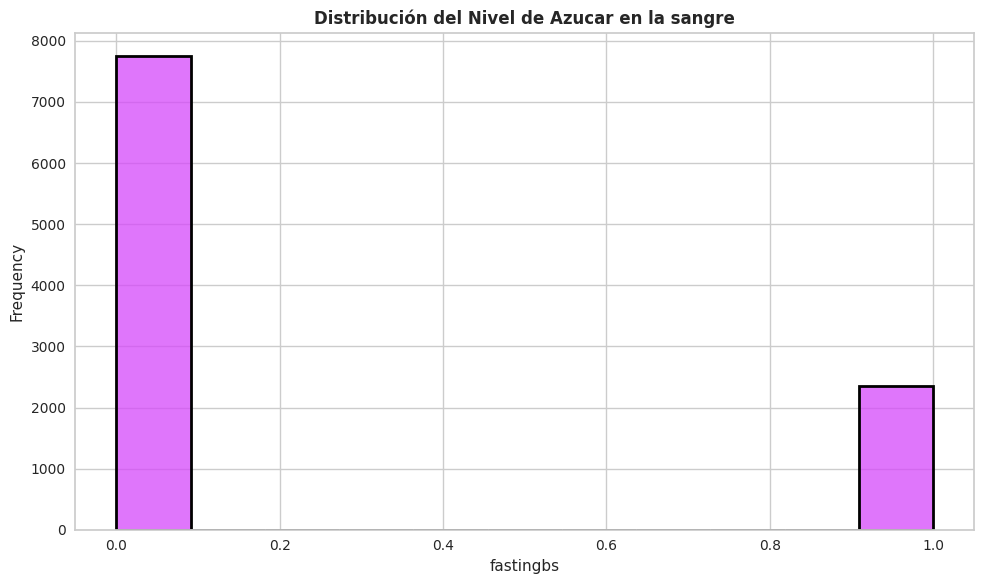

In [203]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='fastingbs',edgecolor='black',
             linewidth=2,
             color='#D548FA',
             stat='frequency')
plt.title('Distribución del Nivel de Azucar en la sangre',fontweight='bold')
plt.tight_layout()
plt.show()

maxhr

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

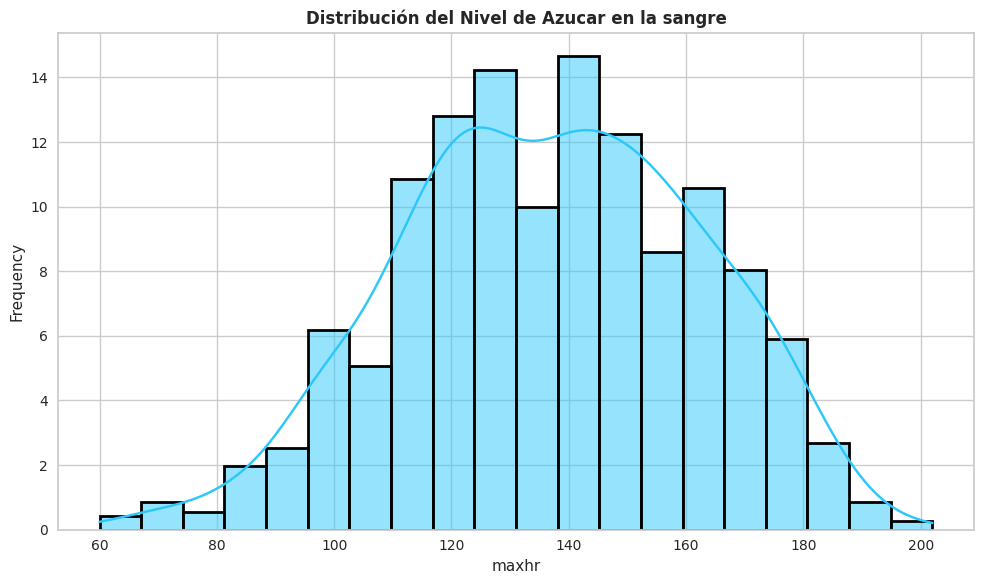

In [204]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='maxhr',edgecolor='black',
             linewidth=2,
             color='#2DC8FA',
             stat='frequency',
             kde=True)
plt.title('Distribución del Nivel de Azucar en la sangre',fontweight='bold')
plt.tight_layout()
plt.show()

oldpeak

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

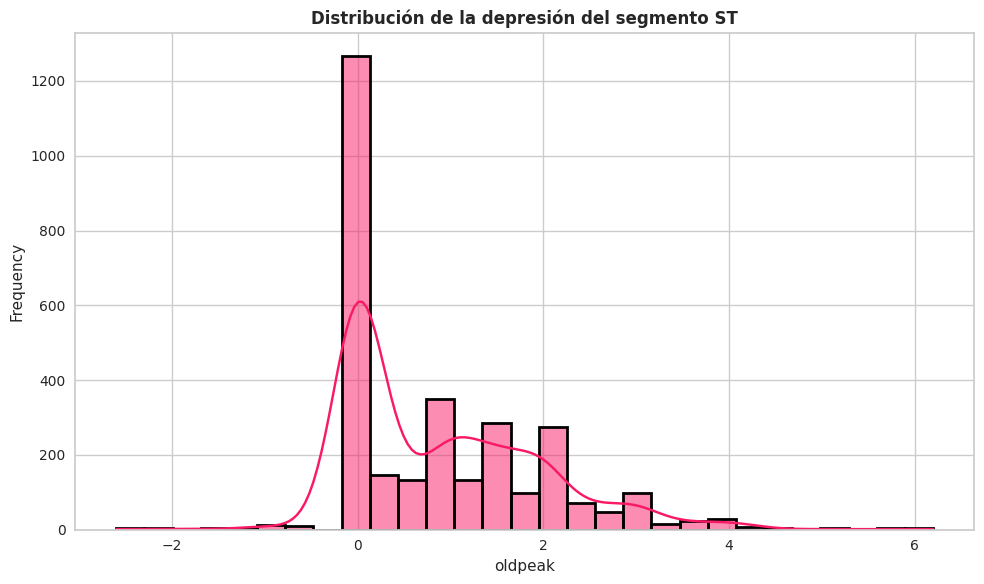

In [205]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='oldpeak',edgecolor='black',
             linewidth=2,
             color='#FA1A64',
             stat='frequency',
             kde=True)
plt.title('Distribución de la depresión del segmento ST',fontweight='bold')
plt.tight_layout()
plt.show()

heartdisease

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

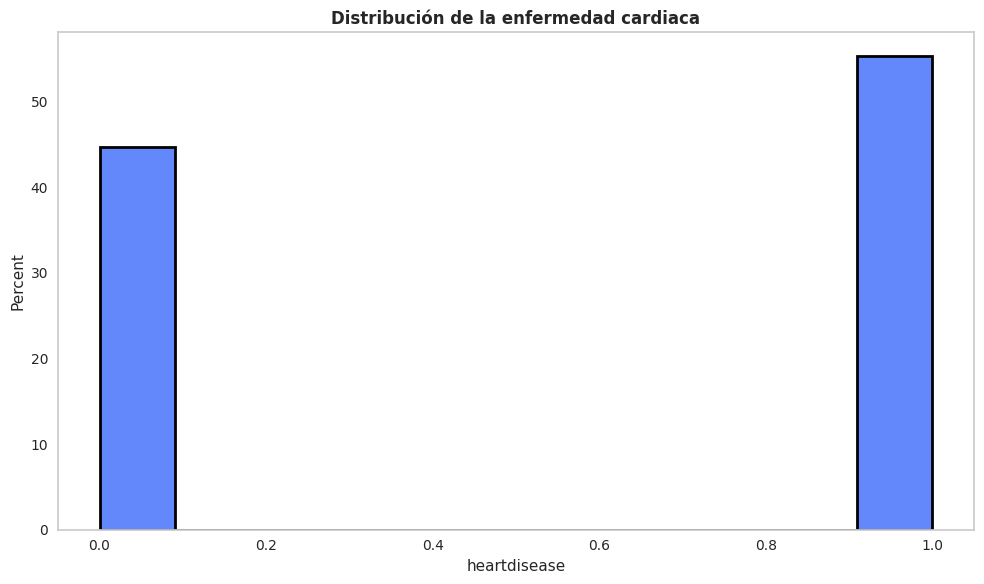

In [206]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='heartdisease',edgecolor='black',
             linewidth=2,
             color='#2F60FA',
             stat='percent',
             )
plt.title('Distribución de la enfermedad cardiaca',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

restingbp

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

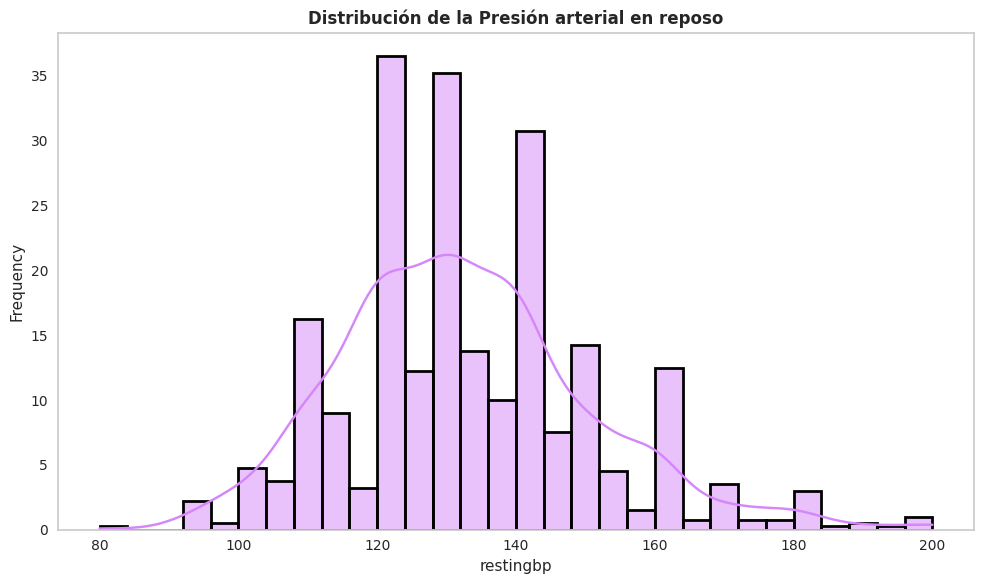

In [207]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='restingbp',edgecolor='black',
             linewidth=2,
             color='#D587FA',
             stat='frequency',
             kde=True)
plt.title('Distribución de la Presión arterial en reposo',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

cholesterol

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

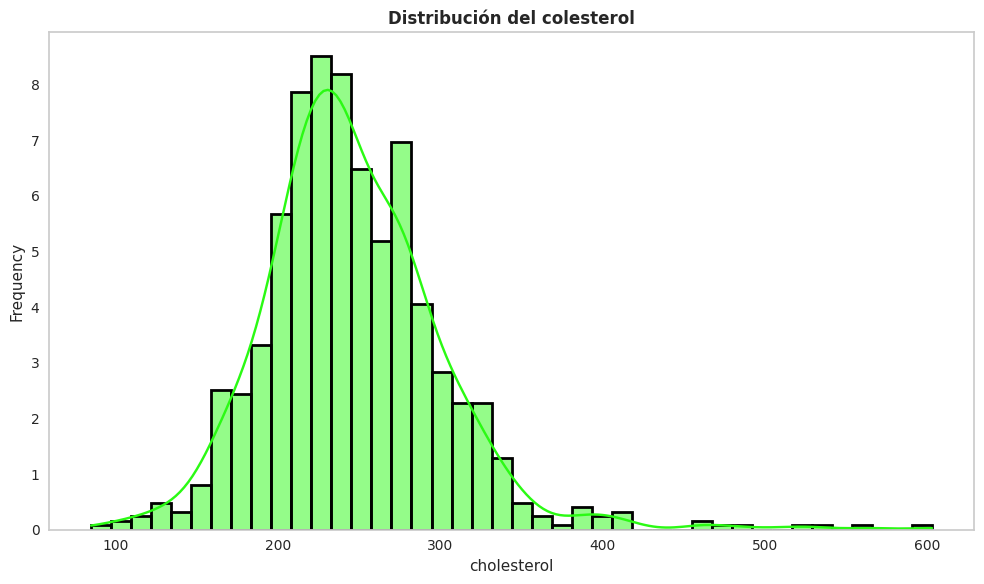

In [208]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(data= df,x='cholesterol',edgecolor='black',
             linewidth=2,
             color='#2BFA14',
             stat='frequency',
             kde=True)
plt.title('Distribución del colesterol',fontweight='bold')
plt.grid()
plt.tight_layout()
plt.show()

4. **Análisis Bivariado y Multivariado**

* Correlación entre variables

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

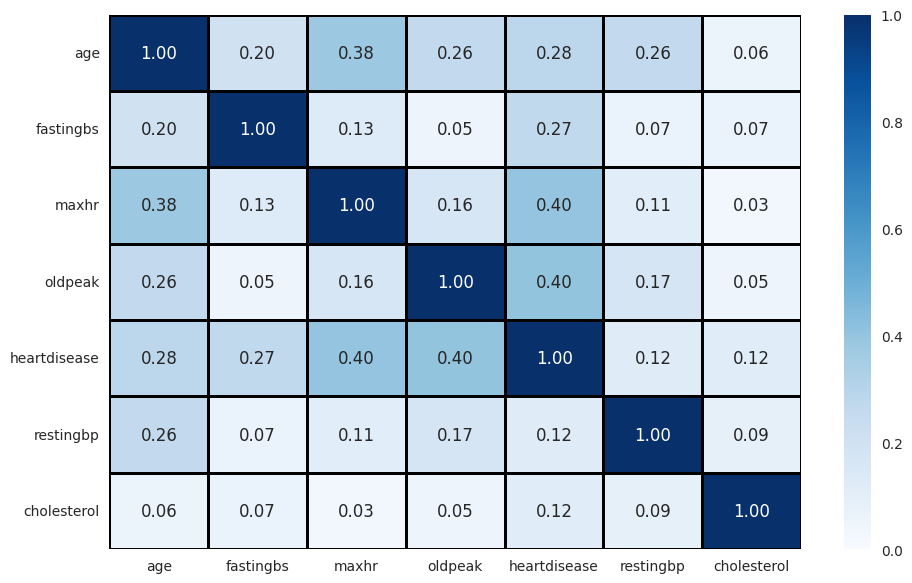

In [209]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr().abs(),annot=True,vmin=0,vmax=1,cmap='Blues',linewidths=2,fmt='.2f',linecolor='black')
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

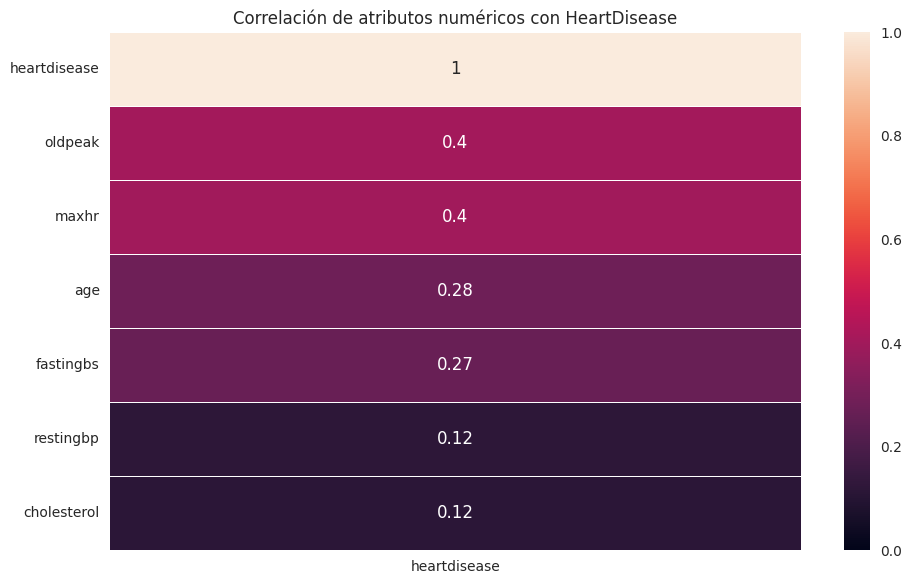

In [210]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=df.corr(method="pearson", numeric_only=True).abs()[["heartdisease"]].sort_values('heartdisease', ascending=False), 
            vmin=0, vmax=1, 
            annot=True,
            linewidths=0.5
            )
plt.title("Correlación de atributos numéricos con HeartDisease")
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

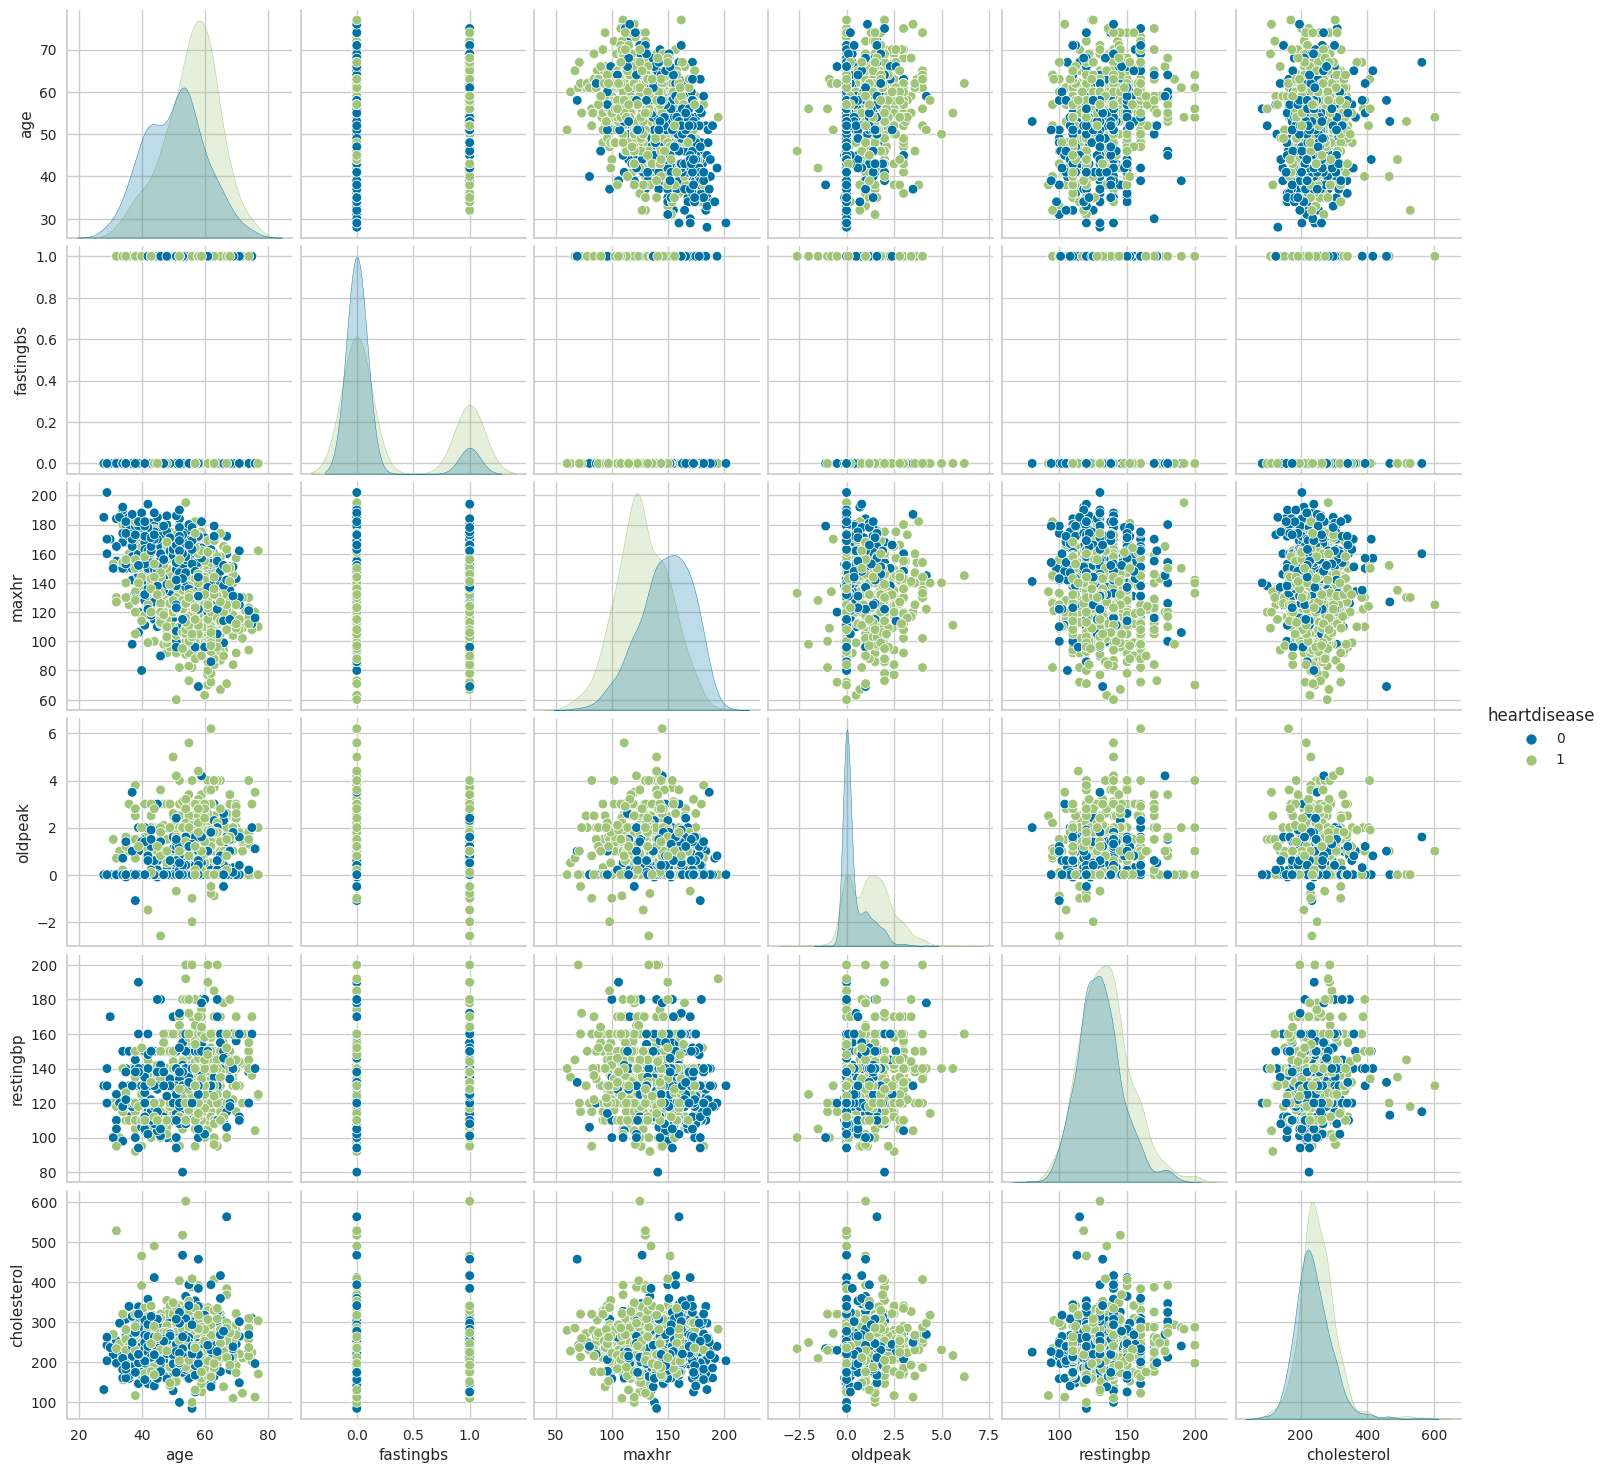

In [211]:
# ver imagen completa de la distribución de datos
# =======================================================================================
sns.pairplot(df, hue='heartdisease')
plt.show()

* Analisis Bivariado con respecto al target

Age vs Target

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

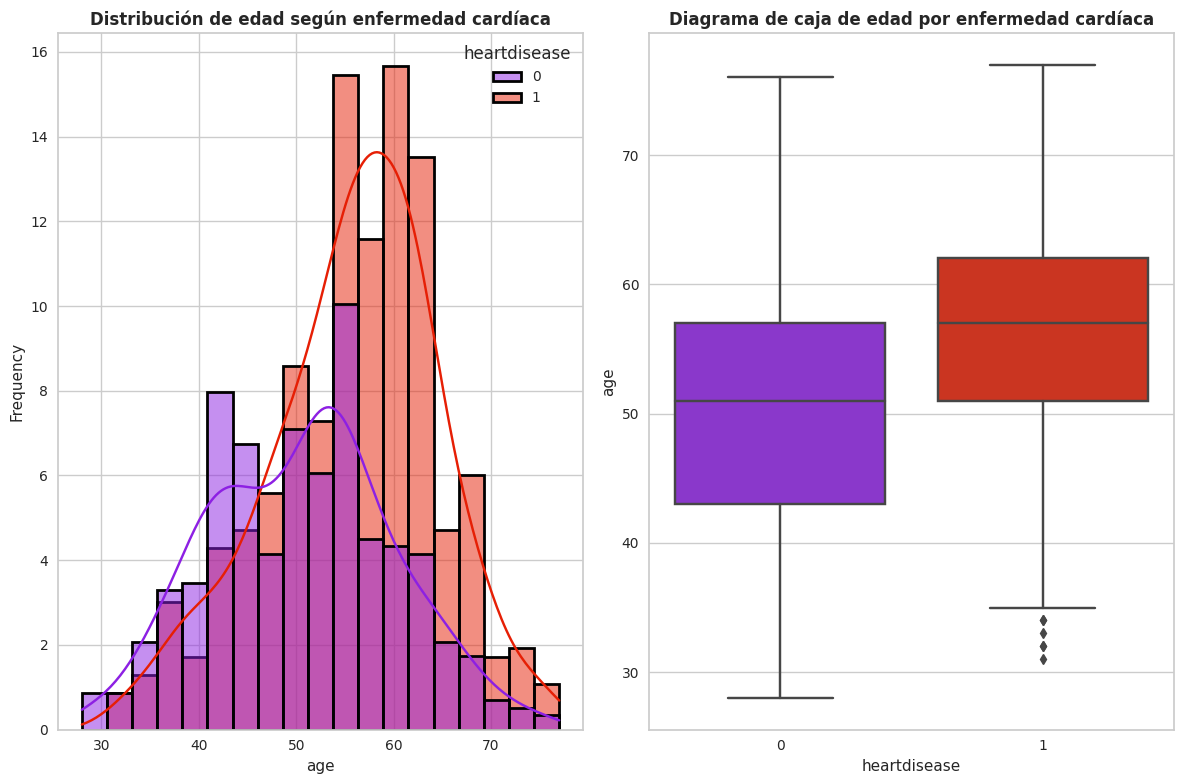

In [212]:
fig ,ax = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
sns.histplot(data=df,x='age',ax= ax[0],hue='heartdisease',
             stat='frequency',
             kde=True,
             palette=['#8D20E3','#E61F05'],
             edgecolor='black',
             linewidth=2)
ax[0].set_title('Distribución de edad según enfermedad cardíaca',fontweight='bold')
plt.tight_layout()

sns.boxplot(data=df,y='age',ax=ax[1],
            x='heartdisease',
            palette=['#8D20E3','#E61F05'])
ax[1].set_title('Diagrama de caja de edad por enfermedad cardíaca',fontweight='bold')
plt.tight_layout()
plt.show()

maxhr vs target

In [213]:
import textwrap

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

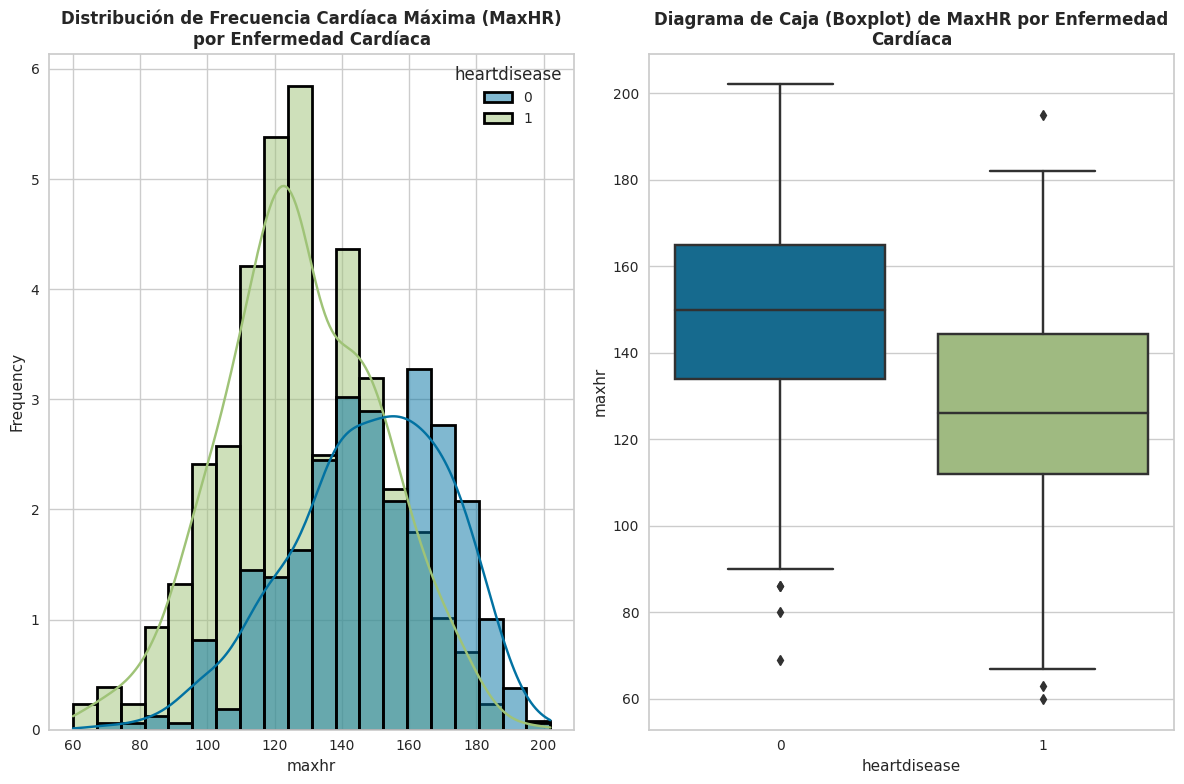

In [214]:
fig ,ax = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
sns.histplot(data=df,x='maxhr',
             ax= ax[0],
             hue='heartdisease',
             stat='frequency',
             kde=True,
             edgecolor='black',
             linewidth=2)
wrapped_text = "\n".join(textwrap.wrap('Distribución de Frecuencia Cardíaca Máxima (MaxHR) por Enfermedad Cardíaca', width=50)) 
ax[0].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()

sns.boxplot(data=df,y='maxhr',ax=ax[1],x='heartdisease')
wrapped_text = "\n".join(textwrap.wrap('Diagrama de Caja (Boxplot) de MaxHR por Enfermedad Cardíaca', width=50)) 
ax[1].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()
plt.show()

oldpeak vs target

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

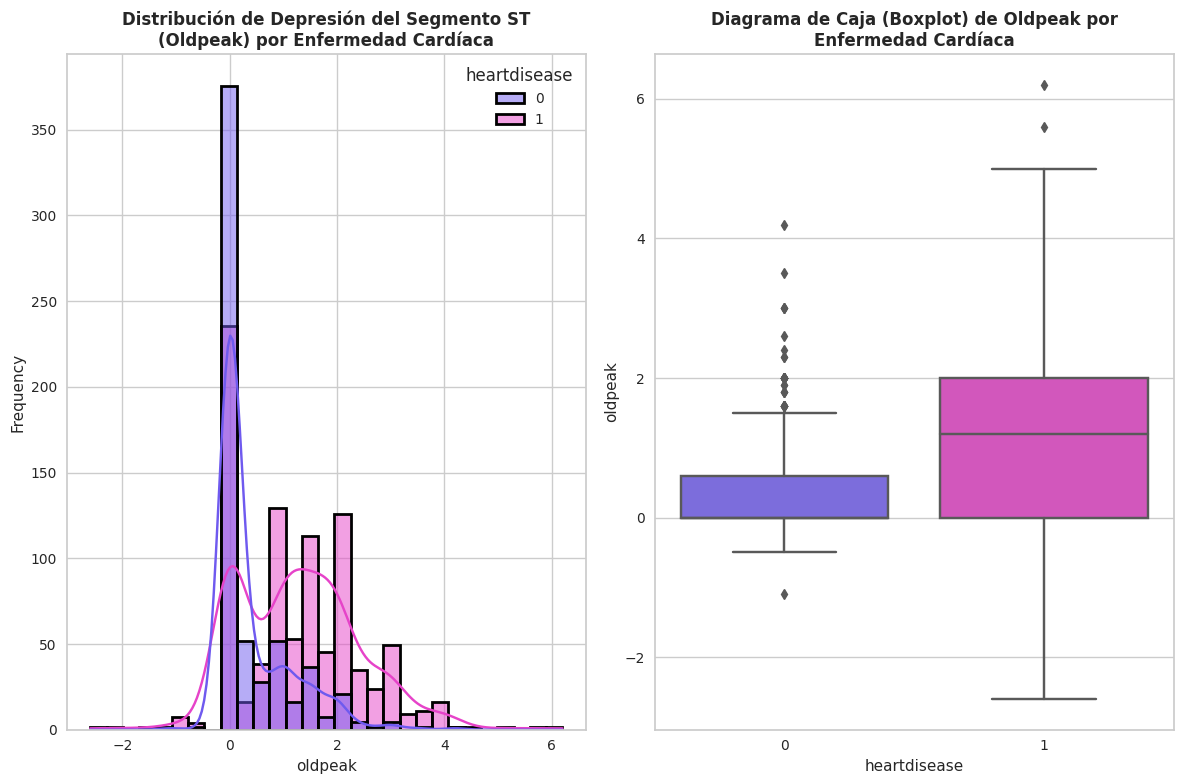

In [215]:
fig ,ax = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
sns.histplot(data=df,x='oldpeak',
             ax= ax[0],
             hue='heartdisease',
             stat='frequency',
             kde=True,
             palette=['#6F5AEF','#E643C9'],
             edgecolor='black',
             linewidth=2)
wrapped_text = "\n".join(textwrap.wrap('Distribución de Depresión del Segmento ST (Oldpeak) por Enfermedad Cardíaca', width=50)) 
ax[0].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()

sns.boxplot(data=df,y='oldpeak',ax=ax[1],x='heartdisease',palette=['#6F5AEF','#E643C9'])
wrapped_text = "\n".join(textwrap.wrap('Diagrama de Caja (Boxplot) de Oldpeak por Enfermedad Cardíaca', width=50)) 
ax[1].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()
plt.show()

restingbp vs target

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

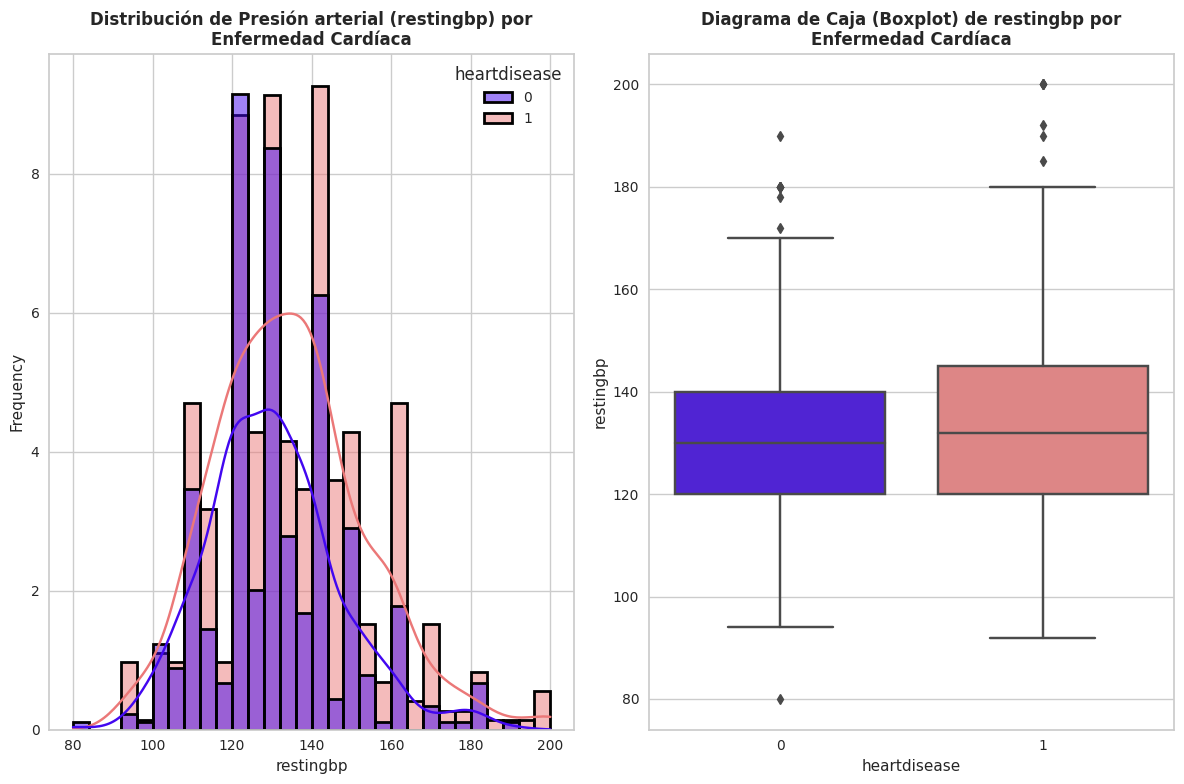

In [216]:
fig ,ax = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
sns.histplot(data=df,x='restingbp',
             ax= ax[0],
             hue='heartdisease',
             stat='frequency',
             kde=True,
             palette=['#4207F0','#EB7878'],
             edgecolor='black',
             linewidth=2)
wrapped_text = "\n".join(textwrap.wrap('Distribución de Presión arterial (restingbp) por Enfermedad Cardíaca', width=50)) 
ax[0].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()

sns.boxplot(data=df,y='restingbp',ax=ax[1],x='heartdisease',palette=['#4207F0','#EB7878'])
wrapped_text = "\n".join(textwrap.wrap('Diagrama de Caja (Boxplot) de restingbp por Enfermedad Cardíaca', width=50)) 
ax[1].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()
plt.show()

cholesterol vs target

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

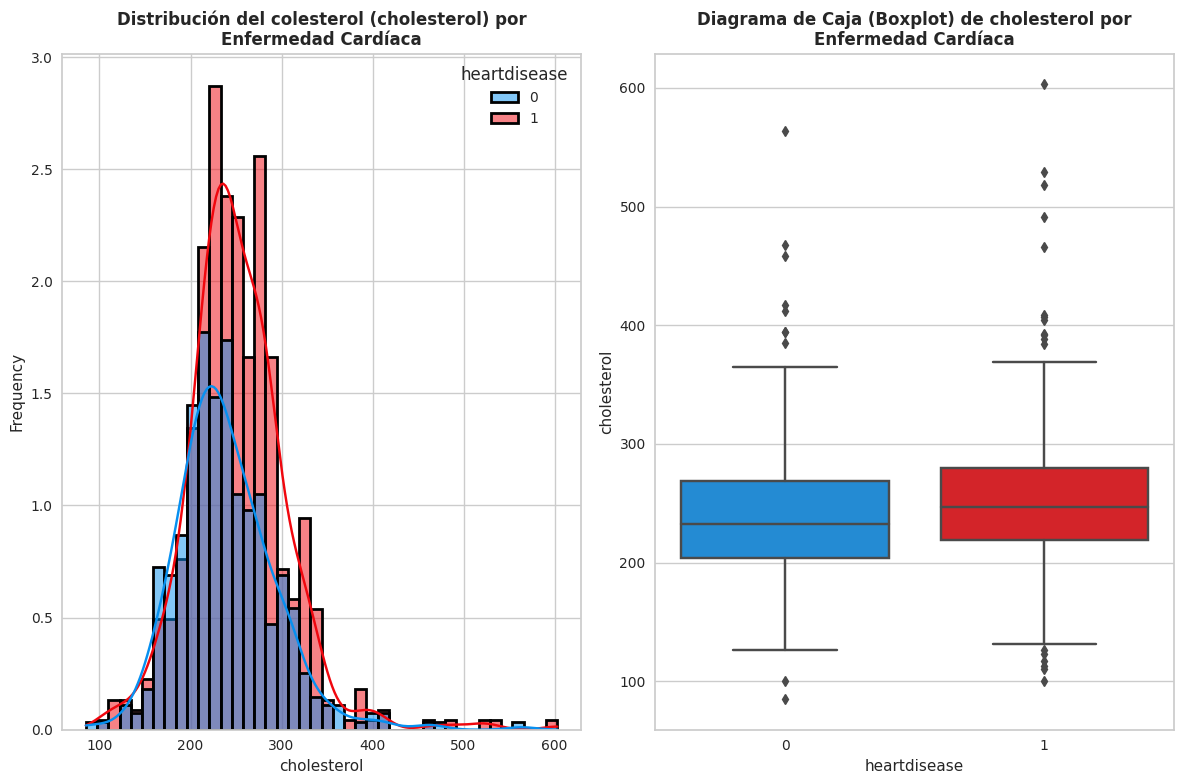

In [217]:
fig ,ax = plt.subplots(nrows=1,ncols=2,figsize = (12,8))
sns.histplot(data=df,x='cholesterol',
             ax= ax[0],
             hue='heartdisease',
             stat='frequency',
             kde=True,
             palette=['#0790F0','#F0070E'],
             edgecolor='black',
             linewidth=2)
wrapped_text = "\n".join(textwrap.wrap('Distribución del colesterol (cholesterol) por Enfermedad Cardíaca', width=50)) 
ax[0].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()

sns.boxplot(data=df,y='cholesterol',ax=ax[1],x='heartdisease',palette=['#0790F0','#F0070E'])
wrapped_text = "\n".join(textwrap.wrap('Diagrama de Caja (Boxplot) de cholesterol por Enfermedad Cardíaca', width=50)) 
ax[1].set_title(wrapped_text,fontweight='bold')
plt.tight_layout()
plt.show()

5. **Identificación de outliers y valores atípicos**

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

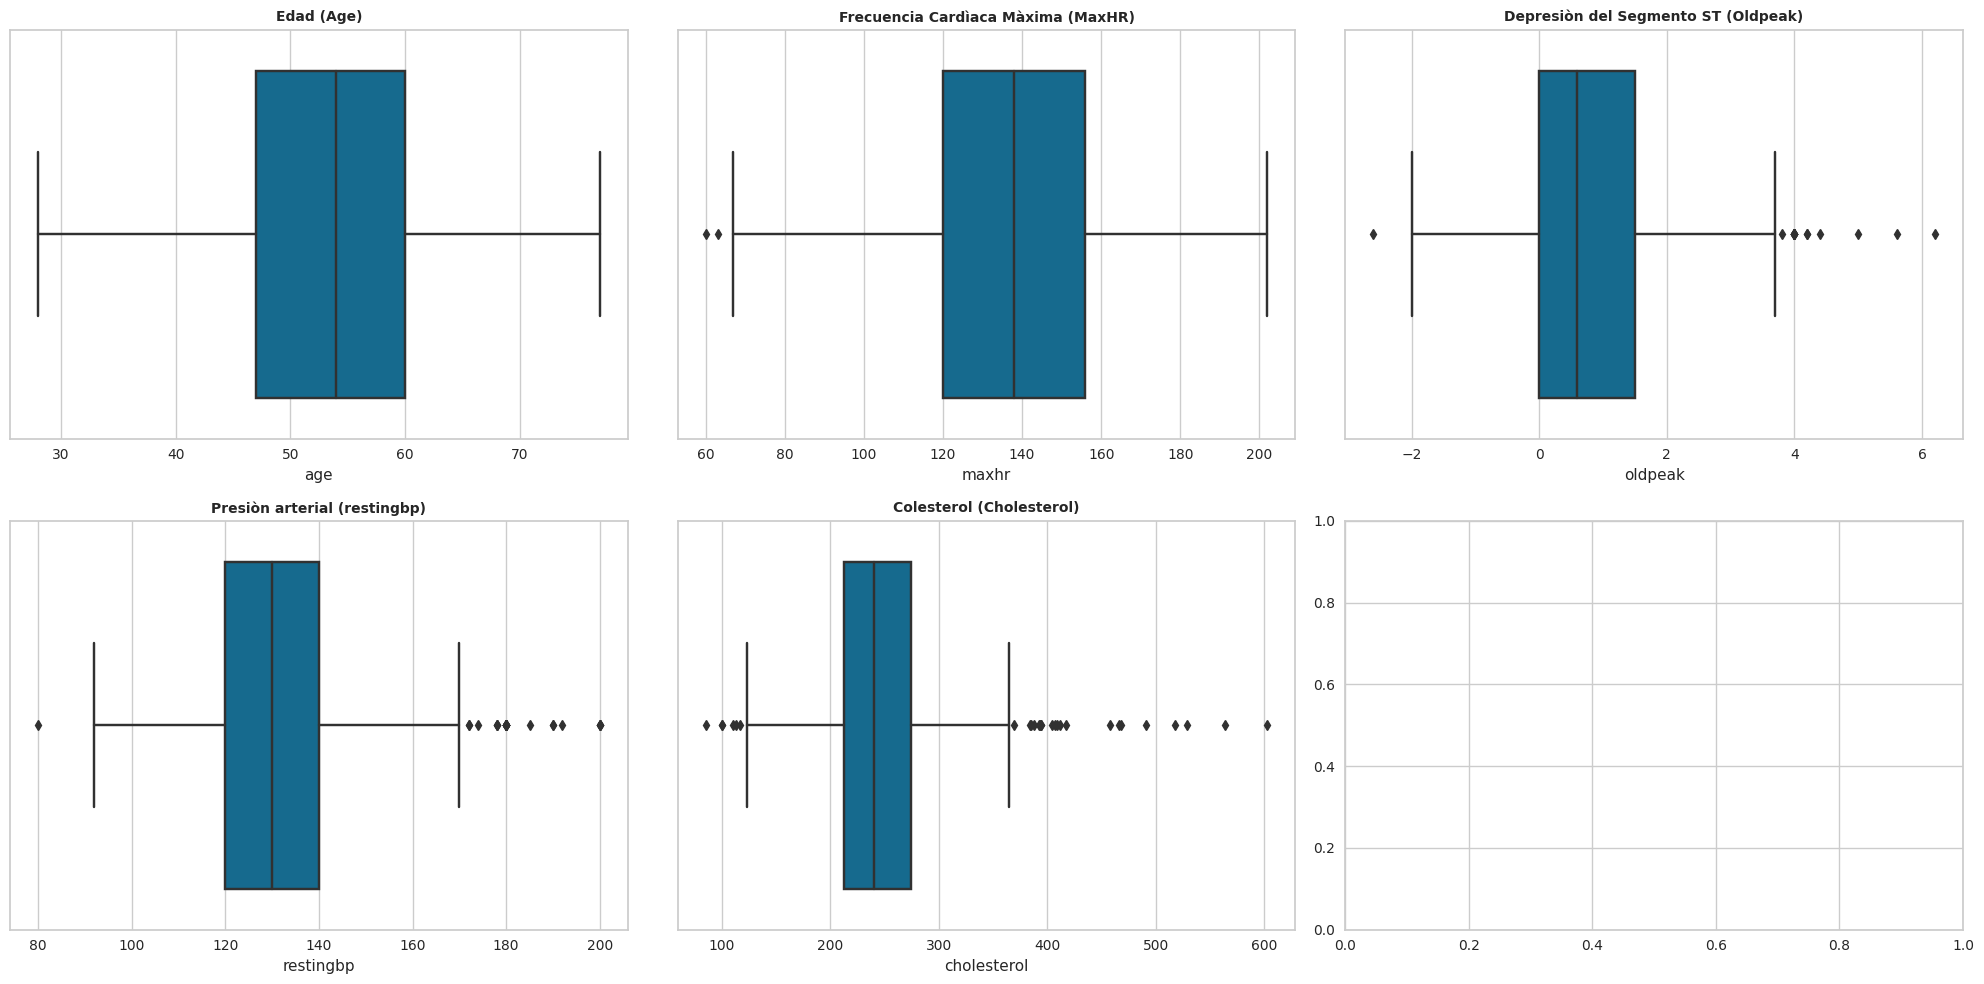

In [218]:
import textwrap

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

titulo = ['Edad (Age)', 'Frecuencia Cardìaca Màxima (MaxHR)','Depresiòn del Segmento ST (Oldpeak)',
          'Presiòn arterial (restingbp)','Colesterol (Cholesterol)']

for i, n in enumerate(['age','maxhr', 'oldpeak','restingbp', 'cholesterol']):
    sns.boxplot(data=df, x=n, ax=axes[i])
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')

plt.tight_layout()
plt.show()

Vemos que algunas variables poseen outliers

In [219]:
# ==============================================================================================================================
Q1 = df[['age','maxhr', 'oldpeak','restingbp', 'cholesterol']].quantile(0.25)
Q3 = df[['age','maxhr', 'oldpeak','restingbp', 'cholesterol']].quantile(0.75)
IQR = Q3-Q1
print(f'Rango intercuartilico(IQR):\n{IQR}')

Rango intercuartilico(IQR):
age            13.0
maxhr          36.0
oldpeak         1.5
restingbp      20.0
cholesterol    61.0
dtype: float64


In [220]:
# Encuentra los valores atípicos para cada columna
# ==============================================================================================================================
outliers = ((df[['age','maxhr', 'oldpeak','restingbp', 'cholesterol']] < (Q1-1.5*IQR)) | (df[['age','maxhr', 'oldpeak','restingbp', 'cholesterol']] > (Q3+1.5*IQR)))
outliers_count = outliers.sum()/len(df[variables_numericas])
print('Porcentaje de outliers por cada variable: \n')
print(outliers_count)

Porcentaje de outliers por cada variable: 

age            0.000000
maxhr          0.002179
oldpeak        0.017429
restingbp      0.029412
cholesterol    0.029412
dtype: float64


In [221]:
from pyod.models.knn import KNN

In [222]:
var_num_cont = ['age','maxhr', 'oldpeak','restingbp', 'cholesterol']

In [223]:
# Crear un modelo de deteccion de outliers
# ================================================================================================================
detector = KNN(contamination = 0.02)

# Entrenar el modelo
# ================================================================================================================
detector.fit(df[var_num_cont])

# predecir los outliers
# ================================================================================================================
outliers_pred = detector.predict(df[var_num_cont])

In [224]:
df_otl = df[outliers_pred == 0].copy()
df_otl.reset_index(drop=True,inplace=True)
display(df_otl.head(3))
print(df_otl.shape)

,age,sex,chestpaintype,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,restingbp,cholesterol
0,40,M,ATA,0,Normal,172,N,0.0,Up,0,140.0,289.0
1,49,F,NAP,0,Normal,156,N,1.0,Flat,1,160.0,180.0
2,37,M,ATA,0,ST,98,N,0.0,Up,0,130.0,283.0


(901, 12)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

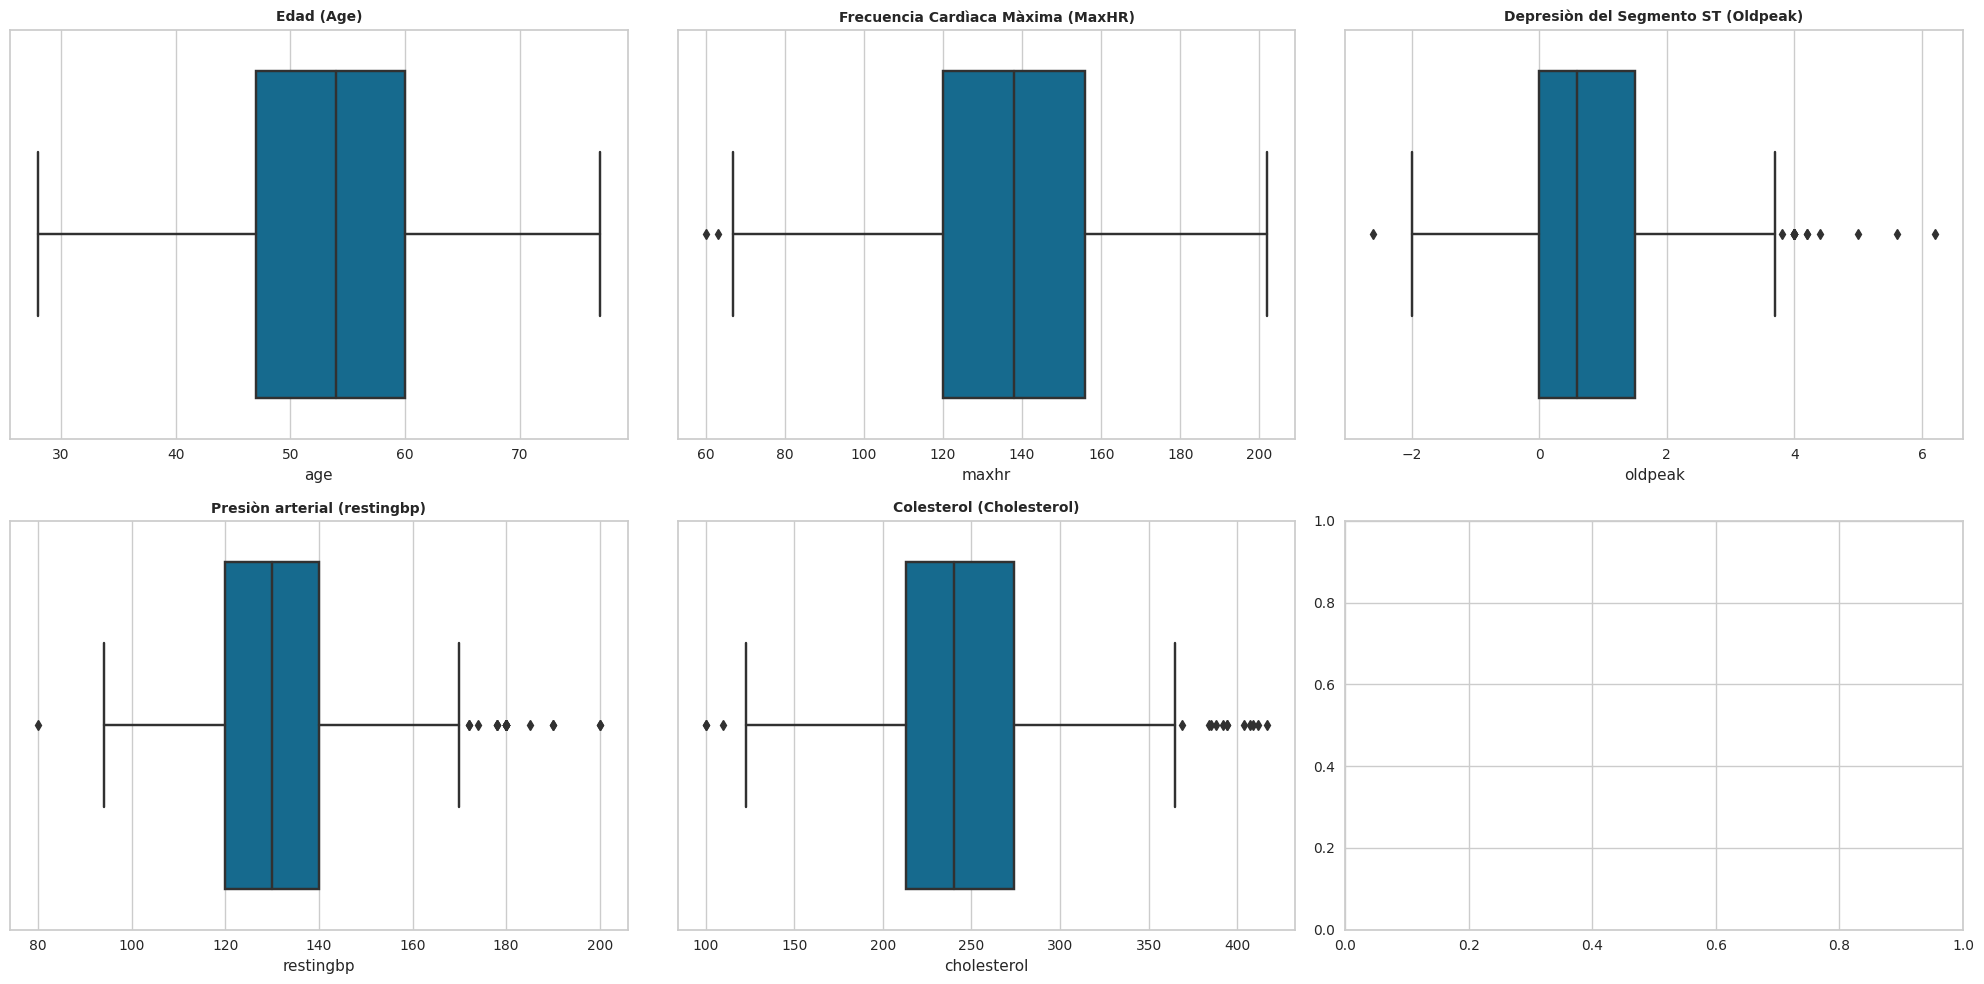

In [225]:
import textwrap

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

titulo = ['Edad (Age)', 'Frecuencia Cardìaca Màxima (MaxHR)','Depresiòn del Segmento ST (Oldpeak)',
          'Presiòn arterial (restingbp)','Colesterol (Cholesterol)']

for i, n in enumerate(['age','maxhr', 'oldpeak','restingbp', 'cholesterol']):
    sns.boxplot(data=df_otl, x=n, ax=axes[i])
    wrapped_text = "\n".join(textwrap.wrap(titulo[i], width=50))  # Dividir el título en varias líneas
    axes[i].set_title(wrapped_text, fontsize=10,fontweight ='bold')

plt.tight_layout()
plt.show()

6. **Escalamiento y encoding**

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder,OneHotEncoder, LabelEncoder,MinMaxScaler, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.manifold import TSNE

In [227]:
cat_onehotencoder = ['sex','chestpaintype','restingecg','exerciseangina','st_slope'] #5
num_power_transf = ['age','maxhr','oldpeak','restingbp','cholesterol']

In [228]:
cat_transf_1 = Pipeline(
    steps = [
        ('encoder',OneHotEncoder(handle_unknown='ignore',drop='first',sparse=False))
    ]
)

num_transf_1 = Pipeline(
    steps=[
        ('transformer',PowerTransformer())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe',cat_transf_1,cat_onehotencoder),
        ('num_pt',num_transf_1,num_power_transf)
    ]
)

pipeline = Pipeline(
    steps = [('preprocessor',preprocessor)]
)

pipe_fit = pipeline.fit(df_otl)

data = pd.DataFrame(pipe_fit.transform(df_otl),columns = pipe_fit.get_feature_names_out().tolist())


In [229]:
data.head(3)

,cat_ohe__sex_M,cat_ohe__chestpaintype_ATA,cat_ohe__chestpaintype_NAP,cat_ohe__chestpaintype_TA,cat_ohe__restingecg_Normal,cat_ohe__restingecg_ST,cat_ohe__exerciseangina_Y,cat_ohe__st_slope_Flat,cat_ohe__st_slope_Up,num_pt__age,num_pt__maxhr,num_pt__oldpeak,num_pt__restingbp,num_pt__cholesterol
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.410130,1.408149,-0.849575,0.505165,0.937206
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.507994,0.748034,0.286586,1.498481,-1.373231
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.695540,-1.518292,-0.849575,-0.058229,0.822295


In [230]:
data.columns

Index(['cat_ohe__sex_M', 'cat_ohe__chestpaintype_ATA',
       'cat_ohe__chestpaintype_NAP', 'cat_ohe__chestpaintype_TA',
       'cat_ohe__restingecg_Normal', 'cat_ohe__restingecg_ST',
       'cat_ohe__exerciseangina_Y', 'cat_ohe__st_slope_Flat',
       'cat_ohe__st_slope_Up', 'num_pt__age', 'num_pt__maxhr',
       'num_pt__oldpeak', 'num_pt__restingbp', 'num_pt__cholesterol'],
      dtype='object')

In [231]:
df.columns

Index(['age', 'sex', 'chestpaintype', 'fastingbs', 'restingecg', 'maxhr',
       'exerciseangina', 'oldpeak', 'st_slope', 'heartdisease', 'restingbp',
       'cholesterol'],
      dtype='object')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

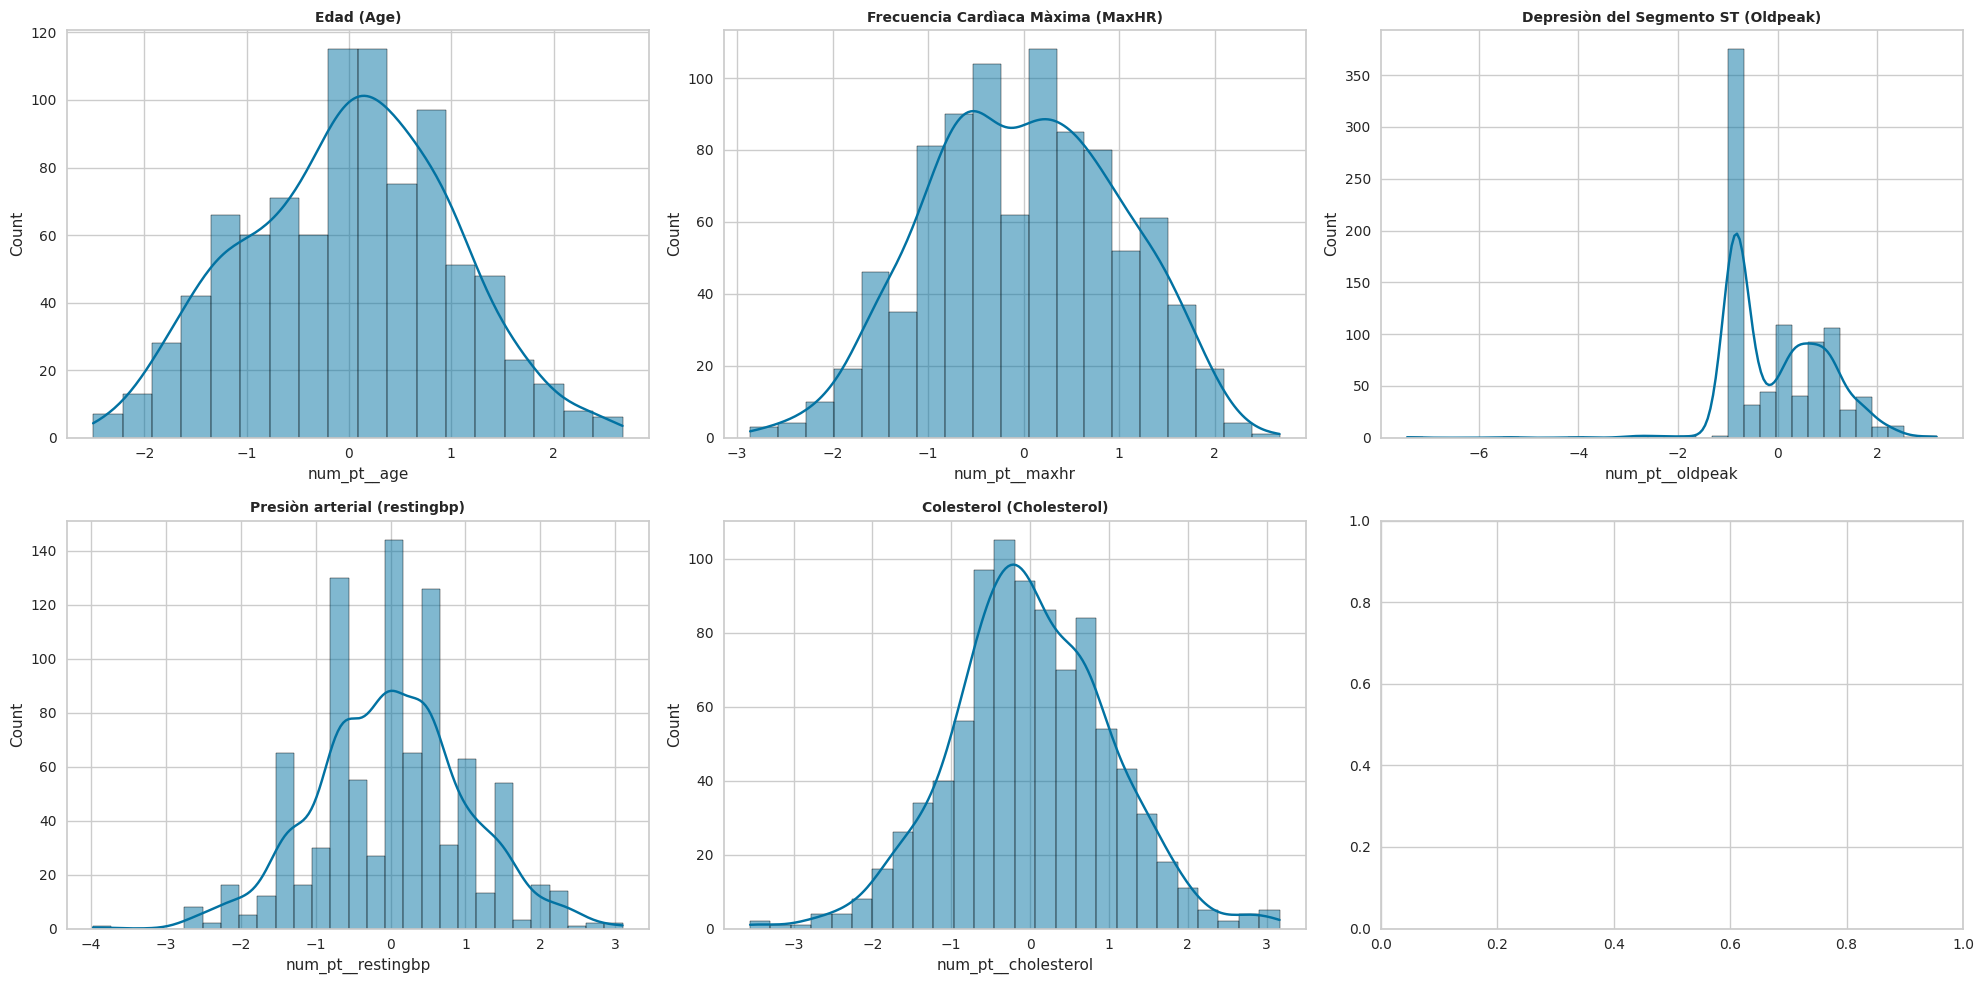

In [232]:
import textwrap

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,10))
axes= [ax1,ax2,ax3,ax4,ax5,ax6]
titulo = ['Edad (Age)', 'Frecuencia Cardìaca Màxima (MaxHR)','Depresiòn del Segmento ST (Oldpeak)',
          'Presiòn arterial (restingbp)','Colesterol (Cholesterol)']
for i , n in enumerate(['num_pt__age', 'num_pt__maxhr','num_pt__oldpeak', 'num_pt__restingbp', 'num_pt__cholesterol']):
    sns.histplot(data=data,x=n,ax=axes[i],kde=True)
    wrapped_text= "\n".join(textwrap.wrap(titulo[i],width=50))
    axes[i].set_title(wrapped_text,fontsize=10,fontweight='bold')
plt.tight_layout()
plt.show()

In [233]:
df_preprocesing = pd.concat([data,df_otl[['fastingbs','heartdisease']]],axis='columns')
display(df_preprocesing.head(3))
print(df_preprocesing.shape)

,cat_ohe__sex_M,cat_ohe__chestpaintype_ATA,cat_ohe__chestpaintype_NAP,cat_ohe__chestpaintype_TA,cat_ohe__restingecg_Normal,cat_ohe__restingecg_ST,cat_ohe__exerciseangina_Y,cat_ohe__st_slope_Flat,cat_ohe__st_slope_Up,num_pt__age,num_pt__maxhr,num_pt__oldpeak,num_pt__restingbp,num_pt__cholesterol,fastingbs,heartdisease
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.410130,1.408149,-0.849575,0.505165,0.937206,0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.507994,0.748034,0.286586,1.498481,-1.373231,0,1
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.695540,-1.518292,-0.849575,-0.058229,0.822295,0,0


(901, 16)


In [234]:
X= df_preprocesing.drop(labels='heartdisease',axis='columns')
y= df_preprocesing['heartdisease']
print('Tamaño de características:',X.shape)
print('Tamaño de variable objetivo: ',y.shape)

Tamaño de características: (901, 15)
Tamaño de variable objetivo:  (901,)


In [235]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [236]:
y_train.value_counts(normalize = True)

1    0.55
0    0.45
Name: heartdisease, dtype: float64

In [237]:
y_test.value_counts(normalize=True)

1    0.552486
0    0.447514
Name: heartdisease, dtype: float64

In [238]:
df_preprocesing.heartdisease.value_counts(normalize=True)*100

1    55.049945
0    44.950055
Name: heartdisease, dtype: float64

In [239]:
from xgboost import XGBClassifier

In [240]:
xgboost_model = XGBClassifier(random_state=42)

In [241]:
params = {
    'n_estimators': [100,150,200],#epresenta el número de árboles en el bosque.
    'colsample_bytree': [0.6, 1.0], #Proporción de características a utilizar en cada árbol (muestreo de columnas)
    
    'max_depth':[5,10,15],# Controla la profundidad máxima de cada árbol en el bosque
    'min_child_weight':[15,20],
    'reg_alpha': [0, 5, 20, 30],# Término de regularización L1 (Lasso)
    'reg_lambda': [0, 10, 20, 30] # Término de regularización L2 (Ridge)
}

In [242]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [243]:
%%time
# Creando un objeto GridSearchCV para buscar los mejores hiperparámetros
# ===================================================================================================================

gridsearch_xgboost = GridSearchCV(
    xgboost_model,
    param_grid = params,
    scoring = ["f1", "recall"],
    refit = 'f1',
    cv = 5,
    return_train_score = True,
    n_jobs = -1,
    verbose = 1
)

gridsearch_xgboost.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
CPU times: user 3.96 s, sys: 89.4 ms, total: 4.05 s
Wall time: 28.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:logistic', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 1.0],
                         'max_depth': [5, 10, 15], 'min_child_weight': [15, 20],
                         'n_estimators': [100, 150, 200],
                         'reg_alpha': [0, 5, 20, 30],
                         'reg_lambda': [0, 10, 20, 30]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring=['f1', 'recall'], verbose=1)

In [244]:
print(f'Mejores Hiperparámetros: {gridsearch_xgboost.best_params_}')

Mejores Hiperparámetros: {'colsample_bytree': 1.0, 'max_depth': 5, 'min_child_weight': 15, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 30}


In [245]:
best_model_xgboost = gridsearch_xgboost.best_estimator_
best_model_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [246]:
best_model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [247]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,auc,roc_curve,RocCurveDisplay,classification_report,roc_auc_score

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       324
           1       0.90      0.92      0.91       396

    accuracy                           0.90       720
   macro avg       0.90      0.90      0.90       720
weighted avg       0.90      0.90      0.90       720



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

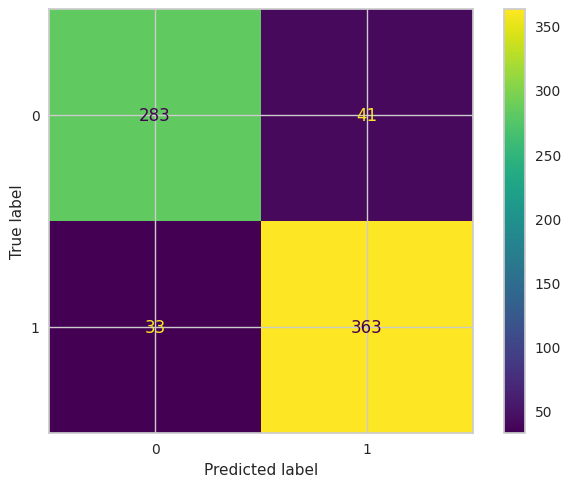

In [248]:
pred_best_xgb_train = best_model_xgboost.predict(X_train)
conf_mat=confusion_matrix(y_train,pred_best_xgb_train)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_train,pred_best_xgb_train))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        81
           1       0.87      0.91      0.89       100

    accuracy                           0.87       181
   macro avg       0.87      0.87      0.87       181
weighted avg       0.87      0.87      0.87       181



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

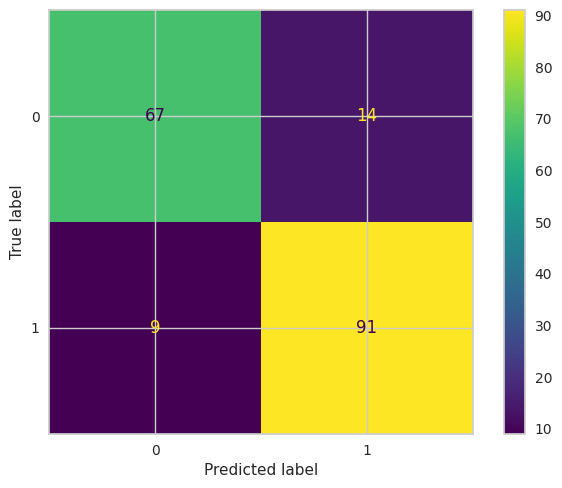

In [249]:
pred_best_xgb_test = best_model_xgboost.predict(X_test)
conf_mat=confusion_matrix(y_test,pred_best_xgb_test)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(classification_report(y_test,pred_best_xgb_test))

In [250]:
#auc = metrics.roc_auc_score(Y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, pred_best_xgb_test, multi_class='ovr')
print("La medida AUC para el clasificador %s es %.4f"%(best_model_xgboost.__class__.__name__,auc))

La medida AUC para el clasificador XGBClassifier es 0.8686


**Modelo de clasificación de PyCaret**

In [251]:
#!pip install pycaret

In [252]:
from pycaret.classification import setup,models,compare_models,evaluate_model

PyCaret Setup

In [253]:
s = setup(data=df,target='heartdisease',
          ignore_features=['ejection_fraction'],
          categorical_features=['sex' ,'chestpaintype' ,'restingecg' ,'exerciseangina', 'st_slope'],
          normalize=True,
          normalize_method='minmax',
          train_size=0.9,
          verbose=1,
          session_id=42)

,Description,Value
0,Session id,42
1,Target,heartdisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(826, 19)"
6,Transformed test set shape,"(92, 19)"
7,Ignore features,1
8,Ordinal features,2
9,Numeric features,6


In [254]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Getting best model

In [255]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:17:50
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8739,0.9335,0.9014,0.8760,0.8879,0.7439,0.7456,1.6320
rf,Random Forest Classifier,0.8679,0.9234,0.8970,0.8697,0.8825,0.7317,0.7337,0.1170
lr,Logistic Regression,0.8581,0.9225,0.8881,0.8624,0.8744,0.7114,0.7131,0.1290
ridge,Ridge Classifier,0.8569,0.0000,0.8926,0.8583,0.8741,0.7086,0.7117,0.0330
lda,Linear Discriminant Analysis,0.8545,0.9221,0.8882,0.8577,0.8717,0.7038,0.7068,0.0330
gbc,Gradient Boosting Classifier,0.8534,0.9280,0.8729,0.8647,0.8680,0.7031,0.7049,0.0650
et,Extra Trees Classifier,0.8522,0.9115,0.8906,0.8529,0.8700,0.6991,0.7032,0.1240
lightgbm,Light Gradient Boosting Machine,0.8498,0.9212,0.8795,0.8555,0.8667,0.6948,0.6965,30.8130
ada,Ada Boost Classifier,0.8497,0.9101,0.8664,0.8658,0.8648,0.6956,0.6986,0.0560
xgboost,Extreme Gradient Boosting,0.8425,0.9138,0.8729,0.8504,0.8604,0.6798,0.6826,0.0470


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f81d465be20>
Traceback (most recent call last):
  File "/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/llanos_renzo/anaconda3/envs/py310/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <

[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 332
[LightGBM] [Info] Number of positive: 412, number of negative: 332
[LightGBM] [Info] Number of positive: 411, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.192272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 743, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553163 -> initscore=0.213458
[LightGBM] [Info] Start training fr

In [256]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…